## Урок 8. Домашнее задание 
### 8.1 Задание высокого уровня

Давайте проверим, как t-sne может улучшить Ваши модели. Для начала загрузим данные и построим Baseline модель без преобразования входных данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

Вычисляем скор baseline модели (по тестовым данным)

In [2]:
eval_model(X, y)

Accuracy: 0.80000


Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

In [3]:
# pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X) 
eval_model(X_pca, y)

Accuracy: 0.83333


In [4]:
Labels = df_source.customes_class.unique()
Labels

array([0., 2., 1.])

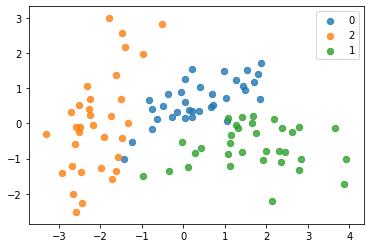

In [5]:
for n in Labels:
    plt.scatter(X_pca[(df_source.customes_class.values == n), 0], X_pca[(df_source.customes_class.values == n), 1],
                s=40, marker='o', alpha=0.8, label = str(n)[0])
plt.legend()
plt.show()

In [22]:
# tsne
from sklearn.manifold import TSNE
tsne_transformer = TSNE(n_components=2)
X_tsne = tsne_transformer.fit_transform(X)
eval_model(X_tsne, y)

Accuracy: 0.93333


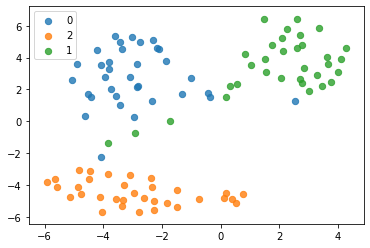

In [16]:
for n in Labels:
    plt.scatter(X_tsne[(df_source.customes_class.values == n), 0], X_tsne[(df_source.customes_class.values == n), 1],
                s=40, marker='o', alpha=0.8, label = str(n)[0])
plt.legend()
plt.show()

In [14]:
# Вывод:
# точность с помощью метода рса = 0,83
# точность с помощью метода рса = 0,87 .. 0.97 (значение варьируется)
# с помощью модели tsne можно добиться большей точности

В этом уроке мы познакомились с новым алгоритмом t-SNE. Какие у него есть недостатки?

* требует бережной настройки параметров на валидационной выборке (см. документацию - там очень много параметров)
* плохо работает, когда данных очень много.

На больших объёмах данных (более 10к элементов) следует применять более простые алгоритмы - PCA или SVD.